In [1]:
%load_ext autoreload
%autoreload 2

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from fsha import *
from datasets import image
from models import resnet
import pickle

In [2]:
gpus = tf.config.list_physical_devices('GPU')
if gpus:
  # Restrict TensorFlow to only use the second GPU
  try:
    tf.config.set_visible_devices(gpus[1], 'GPU')
    logical_gpus = tf.config.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPU")
  except RuntimeError as e:
    # Visible devices must be set before GPUs have been initialized
    print(e)

2 Physical GPUs, 1 Logical GPU


2022-03-27 03:10:14.024752: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-03-27 03:10:14.736512: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 10545 MB memory:  -> device: 1, name: NVIDIA TITAN V, pci bus id: 0000:5e:00.0, compute capability: 7.0


In [3]:
target_ds, aux_ds = image.load_celeba()

2022-03-27 03:12:46.514858: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 1991626752 exceeds 10% of free system memory.
2022-03-27 03:12:49.121735: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 1991626752 exceeds 10% of free system memory.


In [5]:
hparams = {
    'WGAN' : True,
    'gradient_penalty' : 500.,
    'style_loss' : None,
    'lr_f' :  0.00001,          # tuned according to paper
    'lr_tilde': 0.00001,        # tuned according to paper
    'lr_D': 0.0001,             # tuned according to paper
    'lr_g': 0.001               # given original task lr
}

iterations = 30000
log_frequency = 500

celeba_fsha = {}
log = {}

for split in [2,3,4]:
    print("============================")
    print("======Split level is {}======".format(split))
    print("============================")
    make_f, make_g, make_e, make_d, make_c = resnet.make_resnet_fsha(split=split, act="sigmoid", units=40)
    models = (make_f, make_g, make_e, make_d, make_c)

    # From "Unleashing the tiger: feature inference attacks in split learning"
    if split == 4:
        hparams['lr_D'] = 0.0005

    celeba_fsha["celeba-split="+str(split)] = FSHA(target_ds, aux_ds, models=models, loss_fn=tf.keras.losses.binary_crossentropy, batch_size=64, hparams=hparams)
    log["celeba-split="+str(split)] = celeba_fsha["celeba-split="+str(split)](iterations, verbose=True, progress_bar=False, log_frequency=log_frequency)

======Split level is 2======


2022-03-27 03:15:42.340297: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 1991626752 exceeds 10% of free system memory.


RUNNING...
Use WGAN loss
Use GP
Use WGAN loss
Use GP


2022-03-27 03:15:51.102823: I tensorflow/stream_executor/cuda/cuda_dnn.cc:368] Loaded cuDNN version 8101


Iteration 0000000 train loss: 0.8821, validation: 0.4562
Iteration 0000500 train loss: 0.3449, validation: 0.2668
Iteration 0001000 train loss: 0.3051, validation: 0.1041
Iteration 0001500 train loss: 0.2986, validation: 0.0796
Iteration 0002000 train loss: 0.2954, validation: 0.0699
Iteration 0002500 train loss: 0.2940, validation: 0.0641
Iteration 0003000 train loss: 0.2912, validation: 0.0587
Iteration 0003500 train loss: 0.2889, validation: 0.0566
Iteration 0004000 train loss: 0.2845, validation: 0.0549
Iteration 0004500 train loss: 0.2829, validation: 0.0531
Iteration 0005000 train loss: 0.2806, validation: 0.0513
Iteration 0005500 train loss: 0.2784, validation: 0.0499
Iteration 0006000 train loss: 0.2772, validation: 0.0484
Iteration 0006500 train loss: 0.2734, validation: 0.0473
Iteration 0007000 train loss: 0.2732, validation: 0.0463
Iteration 0007500 train loss: 0.2718, validation: 0.0457
Iteration 0008000 train loss: 0.2703, validation: 0.0447
Iteration 0008500 train loss: 0

2022-03-27 03:50:40.243693: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 1991626752 exceeds 10% of free system memory.


RUNNING...
Use WGAN loss
Use GP
Use WGAN loss
Use GP
Iteration 0000000 train loss: 0.8881, validation: 0.4836
Iteration 0000500 train loss: 0.3487, validation: 0.3020
Iteration 0001000 train loss: 0.3059, validation: 0.1213
Iteration 0001500 train loss: 0.3021, validation: 0.0902
Iteration 0002000 train loss: 0.2998, validation: 0.0780
Iteration 0002500 train loss: 0.2960, validation: 0.0710
Iteration 0003000 train loss: 0.2923, validation: 0.0660
Iteration 0003500 train loss: 0.2895, validation: 0.0626
Iteration 0004000 train loss: 0.2877, validation: 0.0590
Iteration 0004500 train loss: 0.2851, validation: 0.0563
Iteration 0005000 train loss: 0.2844, validation: 0.0546
Iteration 0005500 train loss: 0.2824, validation: 0.0521
Iteration 0006000 train loss: 0.2808, validation: 0.0507
Iteration 0006500 train loss: 0.2776, validation: 0.0489
Iteration 0007000 train loss: 0.2761, validation: 0.0471
Iteration 0007500 train loss: 0.2763, validation: 0.0461
Iteration 0008000 train loss: 0.274

2022-03-27 04:25:27.547224: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 1991626752 exceeds 10% of free system memory.


RUNNING...
Use WGAN loss
Use GP
Use WGAN loss
Use GP
Iteration 0000000 train loss: 0.8981, validation: 0.3794
Iteration 0000500 train loss: 0.3563, validation: 0.2718
Iteration 0001000 train loss: 0.3176, validation: 0.1087
Iteration 0001500 train loss: 0.3148, validation: 0.0845
Iteration 0002000 train loss: 0.3130, validation: 0.0742
Iteration 0002500 train loss: 0.3118, validation: 0.0689
Iteration 0003000 train loss: 0.3085, validation: 0.0639
Iteration 0003500 train loss: 0.3070, validation: 0.0595
Iteration 0004000 train loss: 0.3055, validation: 0.0559
Iteration 0004500 train loss: 0.3044, validation: 0.0526
Iteration 0005000 train loss: 0.3055, validation: 0.0504
Iteration 0005500 train loss: 0.3032, validation: 0.0489
Iteration 0006000 train loss: 0.3032, validation: 0.0477
Iteration 0006500 train loss: 0.3007, validation: 0.0468
Iteration 0007000 train loss: 0.2999, validation: 0.0461
Iteration 0007500 train loss: 0.2993, validation: 0.0452
Iteration 0008000 train loss: 0.298

In [10]:
with open('log/celeba-fsha.pkl', 'wb') as f:
    pickle.dump(log, f)

tf.Tensor(0.0343766, shape=(), dtype=float32)
tf.Tensor(0.035510324, shape=(), dtype=float32)
tf.Tensor(0.035828132, shape=(), dtype=float32)


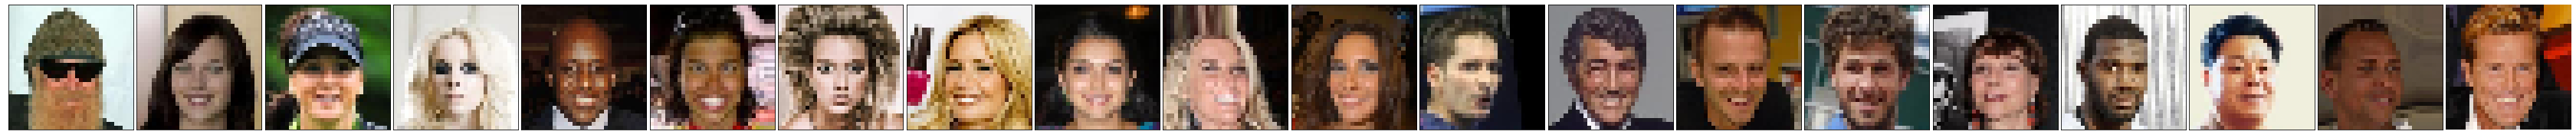

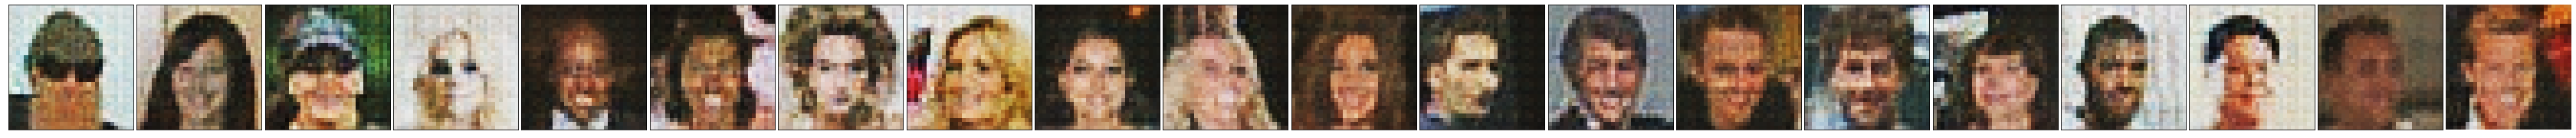

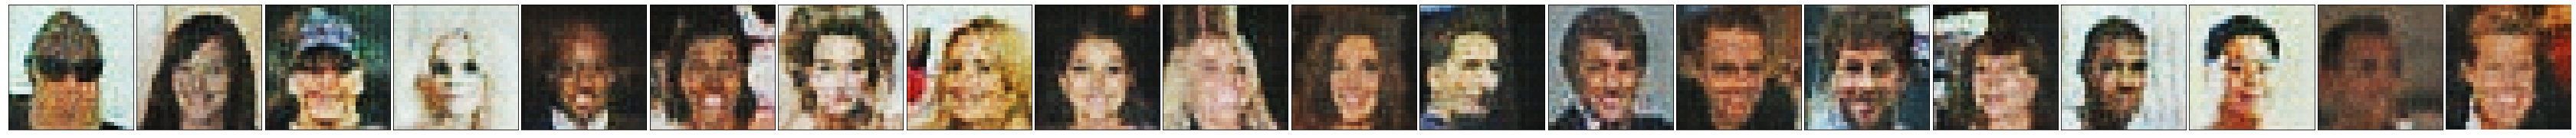

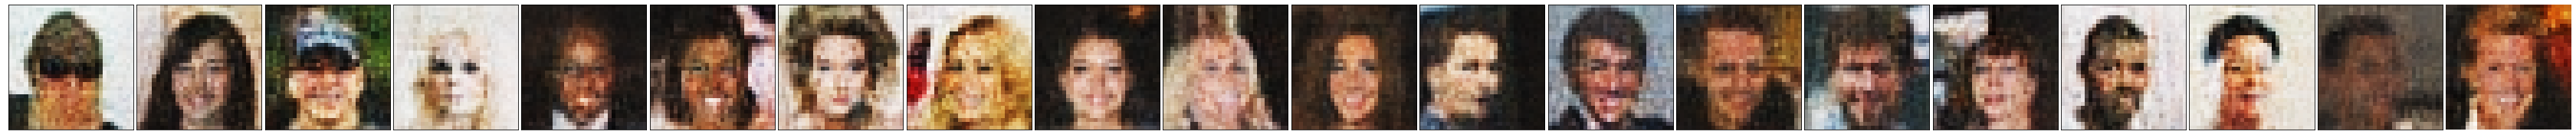

In [9]:
imgs = image.load_celeba(take_first=20)

def plot(X):
    n = len(X)
    X = (X+1)/2
    fig, ax = plt.subplots(1, n, figsize=(n*3,3))
    plt.axis('off')
    plt.subplots_adjust(wspace=0, hspace=-.05)
    for i in range(n):
        ax[i].imshow((X[i]), cmap='inferno')
        ax[i].set(xticks=[], yticks=[])
        ax[i].set_aspect('equal')
    return fig

fig = plot(imgs)
for split in [2,3,4]:
    rec_res, _ = celeba_fsha["celeba-split="+str(split)].attack(imgs)
    fig = plot(rec_res)
    print(tf.keras.losses.MeanSquaredError()(imgs, rec_res))

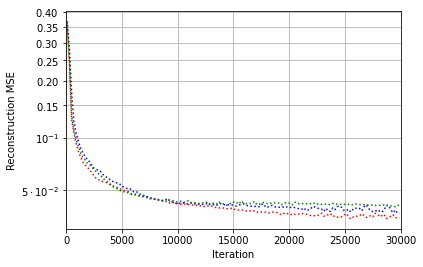

In [12]:
log1 = log
with open('log/celeba-fsha.pkl', 'rb') as f:
    log = pickle.load(f)
# with open('log/celeba.pkl', 'rb') as f:
#     log1 = pickle.load(f)

from matplotlib.pyplot import figure
# figure(figsize=(6.4,4.8))
log_freq = 200
plt.yscale('logit')
plt.xlim([0,30000])
# plt.ylim([0.00, 0.3])
plt.grid()
sampled_log_2 = [sum(log["celeba-split=2"][:,1][i*log_freq:(i+1)*log_freq])/log_freq for i in range(int(len(log["celeba-split=2"][:,0])/log_freq))]
sampled_log_3 = [sum(log["celeba-split=3"][:,1][i*log_freq:(i+1)*log_freq])/log_freq for i in range(int(len(log["celeba-split=3"][:,0])/log_freq))]
sampled_log_4 = [sum(log["celeba-split=4"][:,1][i*log_freq:(i+1)*log_freq])/log_freq for i in range(int(len(log["celeba-split=4"][:,0])/log_freq))]
# sampled_log1_2 = [sum(log1["celeba-split=2"][:,1][i*log_freq:(i+1)*log_freq])/log_freq for i in range(int(len(log1["celeba-split=2"][:,0])/log_freq))]
# sampled_log1_3 = [sum(log1["celeba-split=3"][:,1][i*log_freq:(i+1)*log_freq])/log_freq for i in range(int(len(log1["celeba-split=3"][:,0])/log_freq))]
# sampled_log1_4 = [sum(log1["celeba-split=4"][:,1][i*log_freq:(i+1)*log_freq])/log_freq for i in range(int(len(log1["celeba-split=4"][:,0])/log_freq))]
ran = [i * log_freq + log_freq/2 for i in range(int(30000/log_freq))]
plt.plot(
    ran, sampled_log_2, 'r:',
    ran, sampled_log_3, 'b:',
    ran, sampled_log_4, 'g:',
    # ran, sampled_log1_2, 'ro-',
    # ran, sampled_log1_3, 'b^-',
    # ran, sampled_log1_4, 'gs-',
    markevery=11)
plt.ylabel('Reconstruction MSE')
plt.xlabel('Iteration')
# plt.legend(["FSHA (split level 2)", "FSHA (split level 3)", "FSHA (split level 4)", "Ours (split level 2)", "Ours (split level 3)", "Ours (split level 4)"])
plt.savefig("fig/celeba-fsha-dsa.pdf", bbox_inches='tight')